Дано:
2 датафрейма с постами и соответствующими юзерами, поставивших реакции

Оставляем только релевантных юзеров

In [1]:
import pandas as pd
import numpy as np
import json
from wordcloud import WordCloud

import matplotlib.pyplot as plt

In [2]:
df_1 = pd.read_json('datasets/nastavnichestvo_it_final.json', orient='index')
df_2 = pd.read_json('datasets/prepodavanie_it_final.json', orient='index')

In [3]:
df = pd.concat([df_1,df_2]).reset_index(drop=True)
df

,0,1
0,Будет ли еще мой менторский курс по IT Рекрутм...,{'https://www.linkedin.com/in/ACoAABdk1nkBsBNQ...
1,Всем привет - Нахожусь в поиске работы по спец...,{'https://www.linkedin.com/in/ACoAAAHO6ccBTyhb...
2,Ищем к себе в команду Системного аналитика.Как...,{'https://www.linkedin.com/in/ACoAADIb9yEBkqOP...
3,08.08.22 - 1й день с командой IT_One.Долгождан...,{'https://www.linkedin.com/in/ACoAADlYxTkBWDm_...
4,Как менторам развивать Data Science сообщество...,{'https://www.linkedin.com/in/ACoAADe6becBwuAU...
...,...,...
360,Senior Lecturer/Teaching Professor (Критическо...,{'https://www.linkedin.com/in/ACoAABr9uBYB428_...
361,Сегодня наводила порядки в шкафах и вот что на...,{'https://www.linkedin.com/in/ACoAADQoWmEBKHJ1...
362,Преподавание меня вдохновляет и прививает любо...,{'https://www.linkedin.com/in/ACoAABbILmkBvGgY...
363,Здравствуйте Меня зовут Даша. Я видеооператор/...,{'https://www.linkedin.com/in/ACoAACyx1w8BPlB4...


В идеале нам нужно сходить на линк каждого юзера, отреагировавшего на пост, но алгоритмы Linkedin'а нас быстро забанят. Поэтому будем работать с тем, что есть

In [4]:
df.columns = ['post_text','reacted_users_info']
df

,post_text,reacted_users_info
0,Будет ли еще мой менторский курс по IT Рекрутм...,{'https://www.linkedin.com/in/ACoAABdk1nkBsBNQ...
1,Всем привет - Нахожусь в поиске работы по спец...,{'https://www.linkedin.com/in/ACoAAAHO6ccBTyhb...
2,Ищем к себе в команду Системного аналитика.Как...,{'https://www.linkedin.com/in/ACoAADIb9yEBkqOP...
3,08.08.22 - 1й день с командой IT_One.Долгождан...,{'https://www.linkedin.com/in/ACoAADlYxTkBWDm_...
4,Как менторам развивать Data Science сообщество...,{'https://www.linkedin.com/in/ACoAADe6becBwuAU...
...,...,...
360,Senior Lecturer/Teaching Professor (Критическо...,{'https://www.linkedin.com/in/ACoAABr9uBYB428_...
361,Сегодня наводила порядки в шкафах и вот что на...,{'https://www.linkedin.com/in/ACoAADQoWmEBKHJ1...
362,Преподавание меня вдохновляет и прививает любо...,{'https://www.linkedin.com/in/ACoAABbILmkBvGgY...
363,Здравствуйте Меня зовут Даша. Я видеооператор/...,{'https://www.linkedin.com/in/ACoAACyx1w8BPlB4...


У нас нет большого размеченного датасета чтобы сделать ML-модель определяющую насколько тот или иной юзер для нас релевантен. Поэтому будем визуализировать "облако названий профессий" и убирать из них не-it и около-it специальности.

Оставим профессии со словами `middle`, `senior`, `lead` и исключим нерелевантные специальности

In [5]:
def relevant_job_title_extraction(reactions_info):
    relevant_list = ['senior', 'middle','lead']
    not_relevant_list = ['hr','recruiter','manager','looking','consultant','seo','консультант', 'management']
    job_titles = []
    for user_info in reactions_info.values():
        true_pattern = [x in user_info[1].lower() for x in relevant_list]
        wrong_pattern = [x in user_info[1].lower() for x in not_relevant_list]
        pattern = any(true_pattern) and not any(wrong_pattern)
        if pattern:
            job_titles.append(user_info[1])
    job_titles = ' '.join(job_titles)
    return job_titles

In [6]:
df['job_titles'] = df.reacted_users_info.apply(relevant_job_title_extraction)
df

,post_text,reacted_users_info,job_titles
0,Будет ли еще мой менторский курс по IT Рекрутм...,{'https://www.linkedin.com/in/ACoAABdk1nkBsBNQ...,"Senior DevOps, Python, Go, Terraform, AWS Seni..."
1,Всем привет - Нахожусь в поиске работы по спец...,{'https://www.linkedin.com/in/ACoAAAHO6ccBTyhb...,
2,Ищем к себе в команду Системного аналитика.Как...,{'https://www.linkedin.com/in/ACoAADIb9yEBkqOP...,
3,08.08.22 - 1й день с командой IT_One.Долгождан...,{'https://www.linkedin.com/in/ACoAADlYxTkBWDm_...,Employer brand Lead Lead System Administrator ...
4,Как менторам развивать Data Science сообщество...,{'https://www.linkedin.com/in/ACoAADe6becBwuAU...,Machine Learning Researcher | Academic Leader ...
...,...,...,...
360,Senior Lecturer/Teaching Professor (Критическо...,{'https://www.linkedin.com/in/ACoAABr9uBYB428_...,
361,Сегодня наводила порядки в шкафах и вот что на...,{'https://www.linkedin.com/in/ACoAADQoWmEBKHJ1...,
362,Преподавание меня вдохновляет и прививает любо...,{'https://www.linkedin.com/in/ACoAABbILmkBvGgY...,Senior Software Engineer (Frontend) at HubSpot...
363,Здравствуйте Меня зовут Даша. Я видеооператор/...,{'https://www.linkedin.com/in/ACoAACyx1w8BPlB4...,


In [7]:
filtered_df = df[df['job_titles'] != '']
filtered_df

,post_text,reacted_users_info,job_titles
0,Будет ли еще мой менторский курс по IT Рекрутм...,{'https://www.linkedin.com/in/ACoAABdk1nkBsBNQ...,"Senior DevOps, Python, Go, Terraform, AWS Seni..."
3,08.08.22 - 1й день с командой IT_One.Долгождан...,{'https://www.linkedin.com/in/ACoAADlYxTkBWDm_...,Employer brand Lead Lead System Administrator ...
4,Как менторам развивать Data Science сообщество...,{'https://www.linkedin.com/in/ACoAADe6becBwuAU...,Machine Learning Researcher | Academic Leader ...
5,Пора рассекретится! Начался новый период на бл...,{'https://www.linkedin.com/in/ACoAAD7Ow-sBU2ef...,Senior QA Automation Engineer at OZON.ru Lead ...
6,Завершился третий поток менторской программы д...,{'https://www.linkedin.com/in/ACoAAD-ysXcBrnVM...,Founder GradeBuilder | Lead QA – AstralSoft | ...
...,...,...,...
335,🔥 Долгожданное интервью с Ильёй Климовым уже н...,{'https://www.linkedin.com/in/ACoAAC01zlYBXpYF...,Senior Frontend Developer - buynomics Lead Imp...
342,А вы уже знакомы с ведущим преподавателем и ос...,{'https://www.linkedin.com/in/ACoAADBruA0BxFUb...,Senior Graphic Designer
351,"2 года в HYS EnterpriseСегодня ровно 2 года, к...",{'https://www.linkedin.com/in/ACoAACvHFloBh4aX...,Product Team Lead at Readdle Lead .NET Develop...
356,Здравствуйте! Я Согомонян Нуне. Закончила преп...,{'https://www.linkedin.com/in/ACoAADsDVI0BUExs...,Teacher Leader


In [8]:
wc = WordCloud(background_color="white", font_path="./arial.ttf", width=1600, height=800, max_words=1000)
wc.generate(' '.join(filtered_df.job_titles))

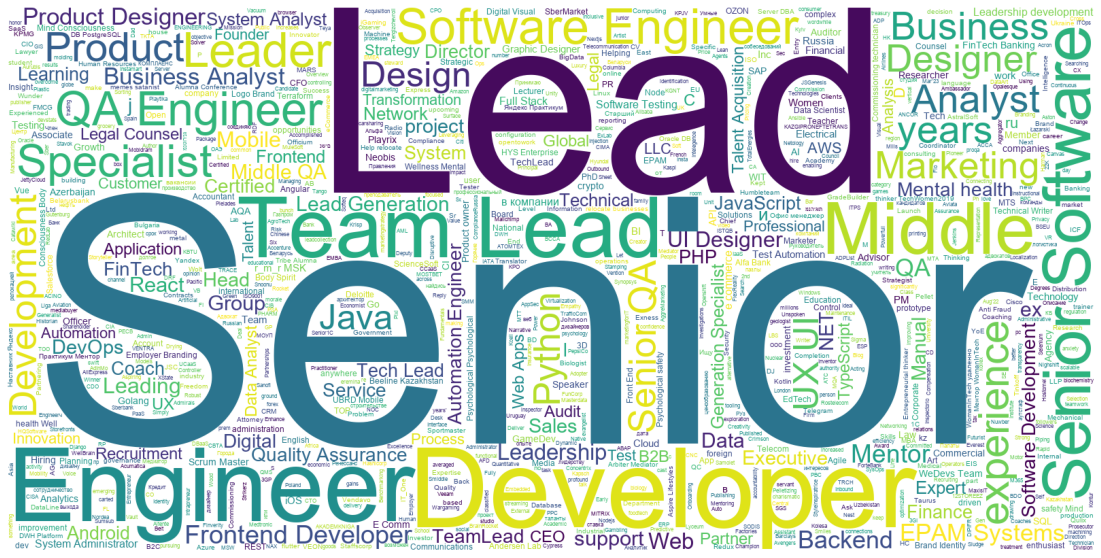

In [9]:
plt.figure(figsize=(20,10))
plt.imshow(wc)
plt.axis("off")
plt.show()

In [10]:
filtered_df.to_csv('datasets/filtered_posts_df.csv', index=False)

In [11]:
pd.read_csv('datasets/filtered_posts_df.csv')

,post_text,reacted_users_info,job_titles
0,Будет ли еще мой менторский курс по IT Рекрутм...,{'https://www.linkedin.com/in/ACoAABdk1nkBsBNQ...,"Senior DevOps, Python, Go, Terraform, AWS Seni..."
1,08.08.22 - 1й день с командой IT_One.Долгождан...,{'https://www.linkedin.com/in/ACoAADlYxTkBWDm_...,Employer brand Lead Lead System Administrator ...
2,Как менторам развивать Data Science сообщество...,{'https://www.linkedin.com/in/ACoAADe6becBwuAU...,Machine Learning Researcher | Academic Leader ...
3,Пора рассекретится! Начался новый период на бл...,{'https://www.linkedin.com/in/ACoAAD7Ow-sBU2ef...,Senior QA Automation Engineer at OZON.ru Lead ...
4,Завершился третий поток менторской программы д...,{'https://www.linkedin.com/in/ACoAAD-ysXcBrnVM...,Founder GradeBuilder | Lead QA – AstralSoft | ...
...,...,...,...
131,🔥 Долгожданное интервью с Ильёй Климовым уже н...,{'https://www.linkedin.com/in/ACoAAC01zlYBXpYF...,Senior Frontend Developer - buynomics Lead Imp...
132,А вы уже знакомы с ведущим преподавателем и ос...,{'https://www.linkedin.com/in/ACoAADBruA0BxFUb...,Senior Graphic Designer
133,"2 года в HYS EnterpriseСегодня ровно 2 года, к...",{'https://www.linkedin.com/in/ACoAACvHFloBh4aX...,Product Team Lead at Readdle Lead .NET Develop...
134,Здравствуйте! Я Согомонян Нуне. Закончила преп...,{'https://www.linkedin.com/in/ACoAADsDVI0BUExs...,Teacher Leader
